#-------------------------The Sparks Foundation----------------------------

## **Author** - Mohd Shan
## **Task 1** - Prediction using Supervised Machine Learning

###**Simple Linear Regression**

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  








In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading dataset
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

### Data Analysis


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Text(0.5, 1.0, 'Correlation Heatmap')

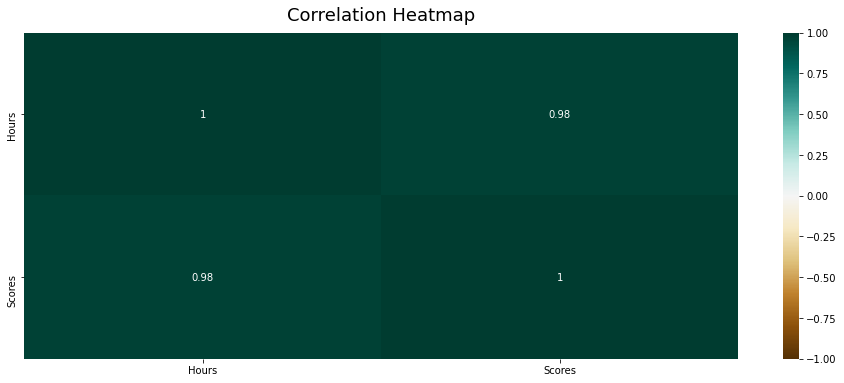

In [6]:
#Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)


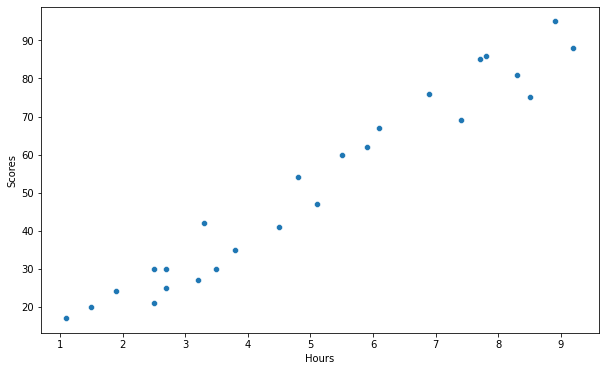

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Hours", y="Scores",  palette="deep")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.



<Figure size 720x432 with 0 Axes>

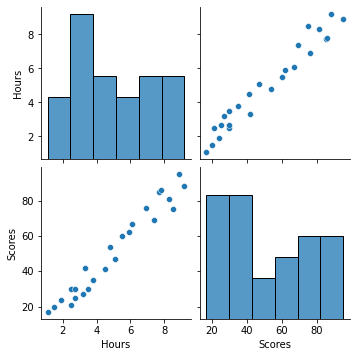

In [8]:
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e7d55e590>,
      dtype=object)

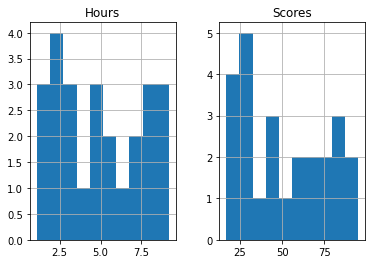

In [9]:

df.hist()

### Preparing Data

In [10]:
X = df[['Hours']]
y = df['Scores']

### Splitting the data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)


\

In [12]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(Linear.coef_)

[9.91065648]


In [14]:
print(Linear.intercept_)

2.018160041434662


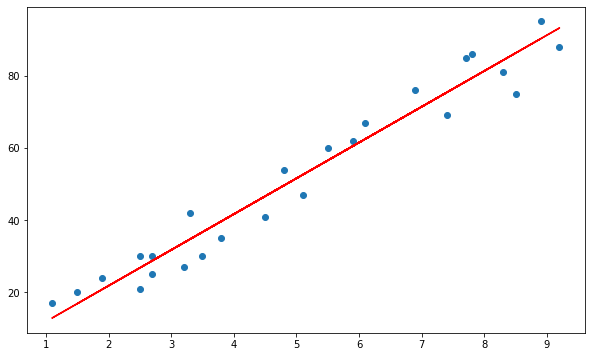

In [15]:
plt.figure(figsize=(10, 6))
l = Linear.coef_*X+Linear.intercept_


plt.scatter(X, y)
plt.plot(X, l,color='red');
plt.show()

In [16]:

y_pred = Linear.predict(X_test)
# Comparing Actual vs Predicted
df_1 = pd.DataFrame({'actual': y_test, 'Predicted': y_pred}) 
df_1

,actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
print("Training Score:",Linear.score(X_train,y_train))
print("Test Score:",Linear.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


# What will be predicted score if a student studies for 9.25 hrs/day ?

*   List item
*   List item



In [20]:

#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', Linear.predict([[9.25]]))


Score of student who studied for 9.25 hours a dat [93.69173249]


## Evaluating the model

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


# Thank you
